## Import Libraries

In [1]:
import train_test
import ABC_train_test
import linearDataset
import network
import statsModel
import performanceMetrics
import dataset
import sanityChecks
import torch 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy.stats import norm
from torch.utils.data import Dataset,DataLoader 
from torch import nn
import warnings
import numpy as np
warnings.filterwarnings('ignore')

## Dataset

Generate the linear dataset 

$y=m*x + c + e$ where $m=1$, $c=0.5$ and $e \sim N(0,1)$

In [2]:
n_samples = 100
n_features = 1

In [3]:
# Parameters
n_samples = 1000


          X         Y
0  0.346839  0.702700
1  0.363173  1.348021
2 -0.082484 -0.844019
3  0.077517  2.400306
4 -0.308601  0.496037


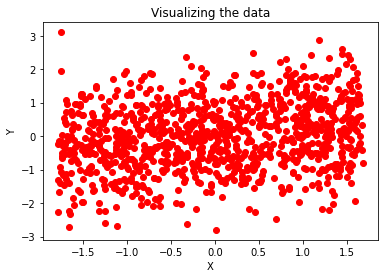

In [4]:
X,Y = linearDataset.linear_data(n_samples)

## Stats Model

The statistical model is assumed to be $Y=\beta X + \mu$ where $\mu \sim N(0,1)$

No handles with labels found to put in legend.


                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.056
Model:                            OLS   Adj. R-squared (uncentered):              0.056
Method:                 Least Squares   F-statistic:                              59.79
Date:                Tue, 05 Oct 2021   Prob (F-statistic):                    2.57e-14
Time:                        19:06:16   Log-Likelihood:                         -1389.9
No. Observations:                1000   AIC:                                      2782.
Df Residuals:                     999   BIC:                                      2787.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

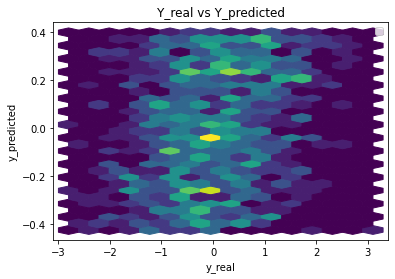

Performance Metrics
Mean Squared Error: 0.9435327455563675
Mean Absolute Error: 0.7835565359936459
Manhattan distance: 783.5565359936461
Euclidean distance: 30.716978131912125


In [5]:
[coeff,y_pred] = statsModel.statsModel(X,Y)

## Generator and Discriminator Networks 


In [6]:
#Discriminator Parameters 
hidden_nodes = 25 
#ABC Generator Parameters
mean = 1 
variance = 0.001

**Generator Model**

In [7]:
class Generator(nn.Module):

  def __init__(self,n_input):
    super().__init__()
    self.output = nn.Linear(n_input,1)

  def forward(self, x):
    x = self.output(x)
    return x 
    

**Discriminator Model**

In [8]:
class Discriminator(nn.Module):
  def __init__(self,n_input,n_hidden):

    super().__init__()
    self.hidden = nn.Linear(n_input,n_hidden)
    self.output = nn.Linear(n_hidden,1)
    self.relu = nn.ReLU()

  def forward(self, x):
    x = self.hidden(x)
    x = self.relu(x)
    x = self.output(x)
    return x 

**ABC Generators** 


1. *Correctly Specified Prior* : The 1st ABC Generator is defined as $Y = m*X + c + e$ where $m \sim N(1,1)$ , $c=0.5$ and $e \sim N(0,1)$
2. *Misspecified Prior* : The 2nd ABC Generator is defined as $Y = 1 + m*X + c + e$ where $m \sim N(1,1)$ , $c=0.5$ and $e \sim N(0,1)$

## GAN Model

In [9]:
real_dataset = dataset.CustomDataset(X,Y)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [10]:
generator = Generator(n_features+1)
discriminator = Discriminator(n_features+1,hidden_nodes)

criterion = torch.nn.BCEWithLogitsLoss()
gen_opt = torch.optim.Adam(generator.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(discriminator.parameters(), lr=0.01, betas=(0.5, 0.999))

In [11]:
n_epochs = 30000
batch_size = n_samples//2

In [12]:
train_test.training_GAN(discriminator,generator,disc_opt,gen_opt,real_dataset,batch_size, n_epochs,criterion,device)

KeyboardInterrupt: 

In [ ]:
train_test.test_generator(generator,real_dataset,device)